In [318]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

In [319]:
df=pd.read_csv("framingham.csv")

In [320]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [321]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [322]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [324]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [325]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)


In [326]:
df_imputed=pd.DataFrame(df_imputed,columns=df.columns)

In [327]:
df_imputed

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,0.0,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,1.0,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,0.0,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,48.0,2.0,1.0,20.0,0.2,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.0,0.0
4236,0.0,44.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,76.8,0.0
4237,0.0,52.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,133.5,83.0,21.47,80.0,107.0,0.0
4238,1.0,40.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,185.0,141.0,98.0,25.60,67.0,72.0,0.0


In [328]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


In [329]:
df_imputed.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.016944,0.197026,0.316187,-0.053873,-0.004550,0.005853,0.015693,-0.070704,-0.035879,0.058199,0.081794,-0.116809,0.003714,0.088374
age,-0.029014,1.000000,-0.166567,-0.213662,-0.192796,0.123110,0.057679,0.306799,0.101314,0.262481,0.394053,0.205586,0.137673,-0.012690,0.125176,0.225408
education,0.016944,-0.166567,1.000000,0.021062,0.010566,-0.009745,-0.035055,-0.081594,-0.037167,-0.023655,-0.129705,-0.062316,-0.138871,-0.054729,-0.035354,-0.053702
currentSmoker,0.197026,-0.213662,0.021062,1.000000,0.766683,-0.049344,-0.032980,-0.103710,-0.044285,-0.046761,-0.130281,-0.107933,-0.167124,0.062767,-0.058540,0.019448
cigsPerDay,0.316187,-0.192796,0.010566,0.766683,1.000000,-0.046950,-0.032697,-0.066875,-0.037074,-0.026108,-0.089103,-0.057287,-0.092901,0.075832,-0.060186,0.057766
BPMeds,-0.053873,0.123110,-0.009745,-0.049344,-0.046950,1.000000,0.114189,0.261062,0.054390,0.080692,0.255033,0.193474,0.101610,0.015725,0.049260,0.089778
prevalentStroke,-0.004550,0.057679,-0.035055,-0.032980,-0.032697,0.114189,1.000000,0.074791,0.006955,0.000070,0.057000,0.045153,0.025822,-0.017680,0.017372,0.061823
prevalentHyp,0.005853,0.306799,-0.081594,-0.103710,-0.066875,0.261062,0.074791,1.000000,0.077752,0.163599,0.696656,0.615840,0.301537,0.146906,0.088794,0.177458
diabetes,0.015693,0.101314,-0.037167,-0.044285,-0.037074,0.054390,0.006955,0.077752,1.000000,0.040322,0.111265,0.050260,0.087023,0.048971,0.601261,0.097344
totChol,-0.070704,0.262481,-0.023655,-0.046761,-0.026108,0.080692,0.000070,0.163599,0.040322,1.000000,0.208768,0.164461,0.115897,0.090547,0.044237,0.082070


In [330]:
df_imputed.duplicated().sum()

0

C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


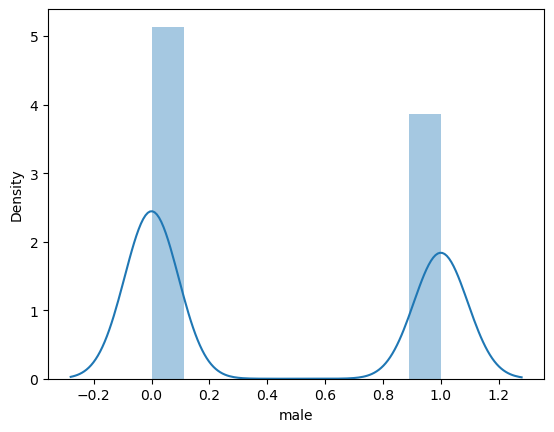

NormaltestResult(statistic=15599.754339953055, pvalue=0.0)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


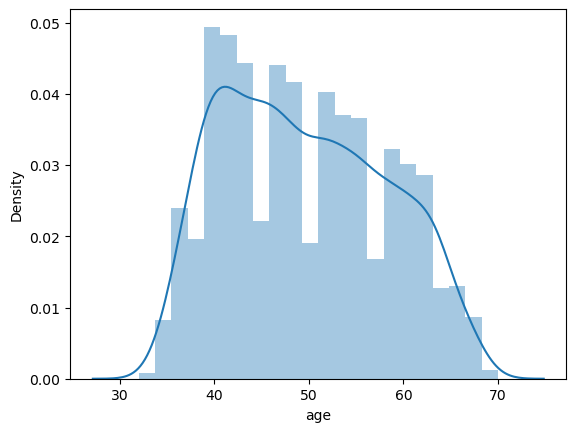

NormaltestResult(statistic=944.8456031386911, pvalue=6.751249422787796e-206)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


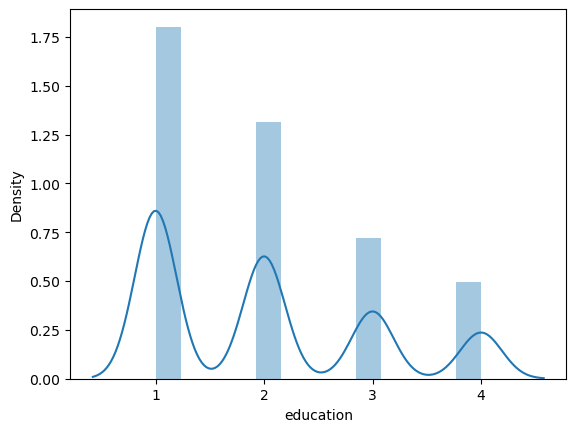

C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=nan, pvalue=nan)


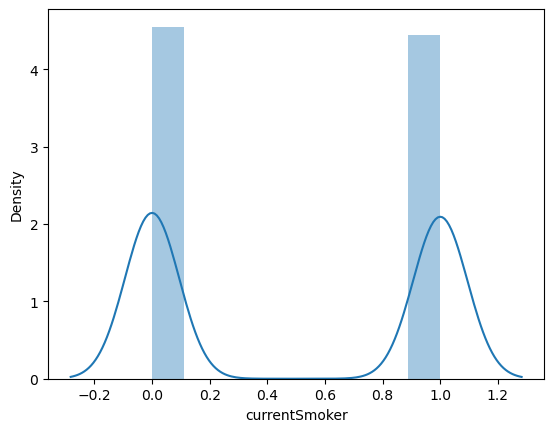

C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


NormaltestResult(statistic=14793.681158298117, pvalue=0.0)


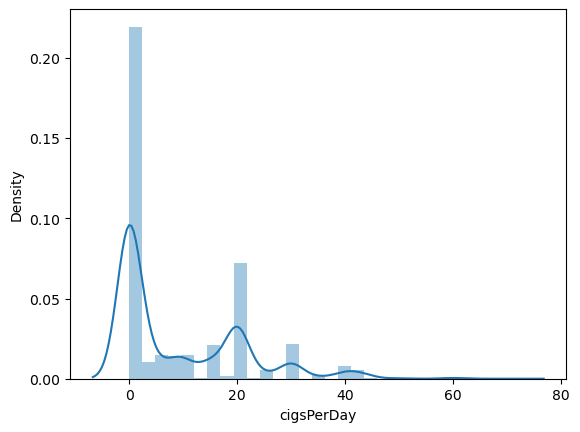

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


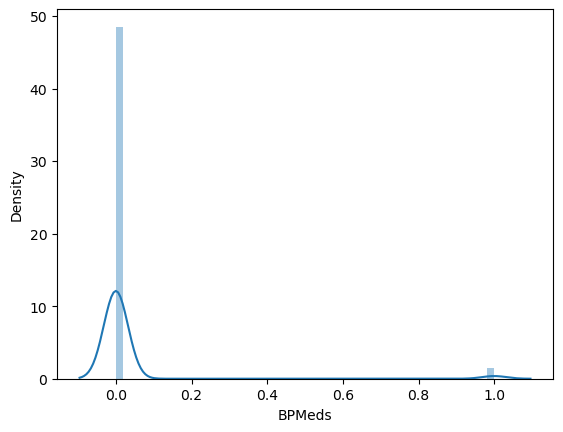

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


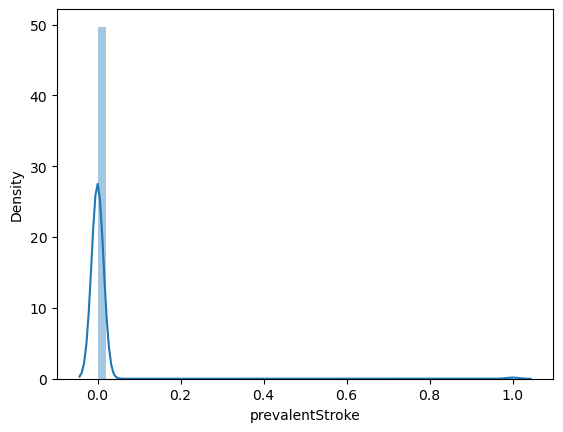

NormaltestResult(statistic=7504.834522713923, pvalue=0.0)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


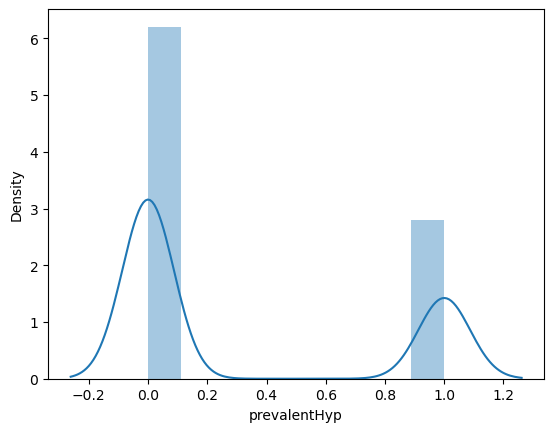

NormaltestResult(statistic=44841.09918047329, pvalue=0.0)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


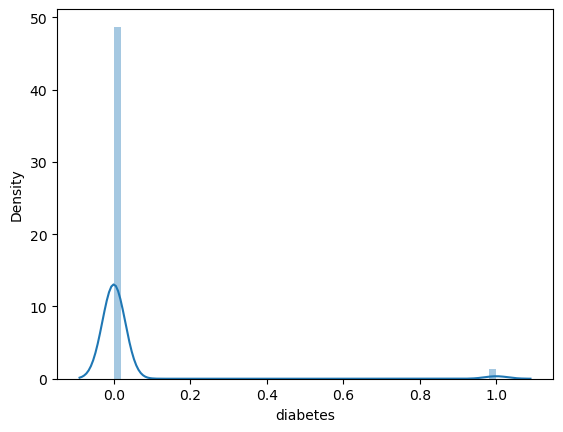

NormaltestResult(statistic=4705.633600359139, pvalue=0.0)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


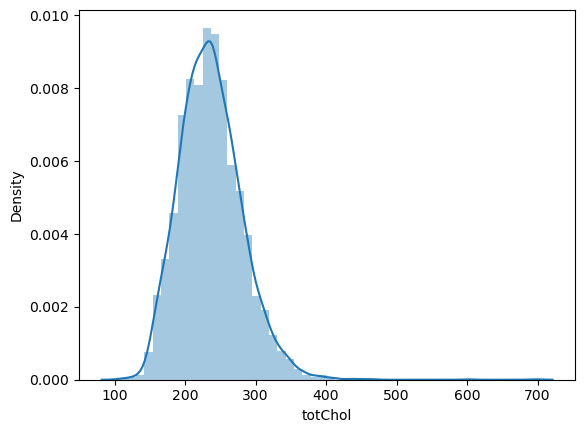

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


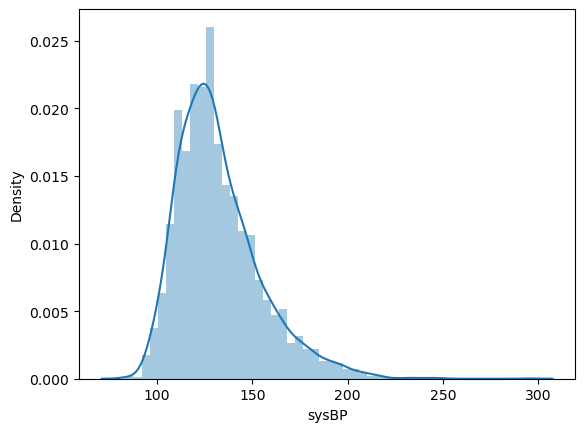

NormaltestResult(statistic=830.7521119247745, pvalue=4.022267786372565e-181)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


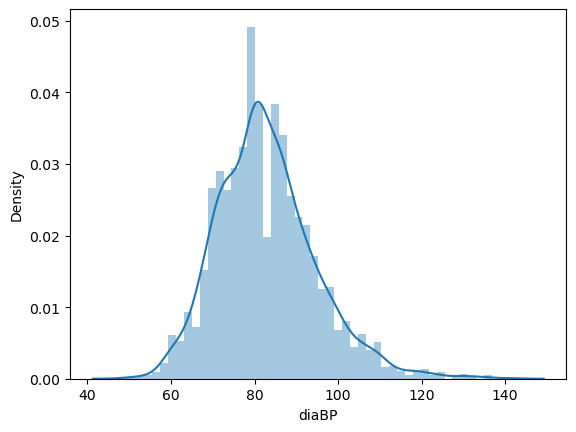

NormaltestResult(statistic=409.9269479984704, pvalue=9.67150922534752e-90)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


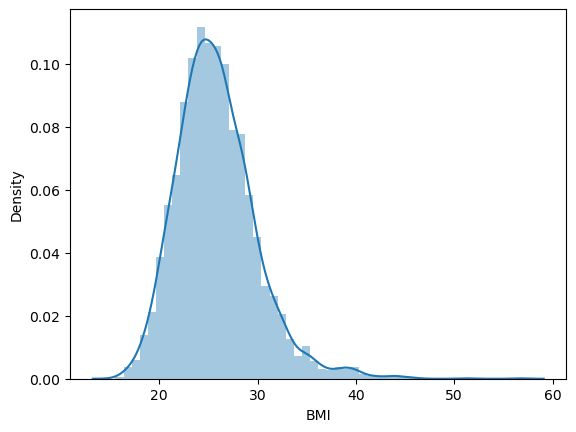

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


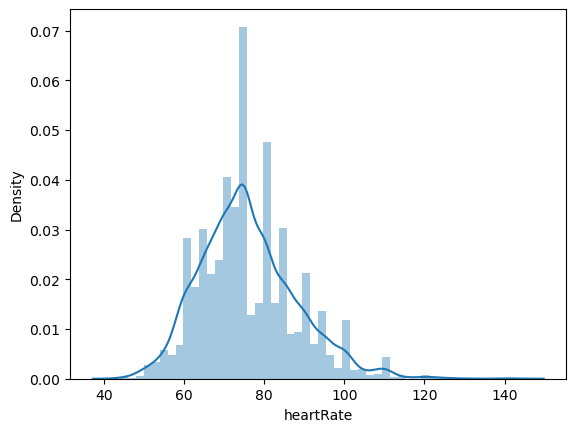

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


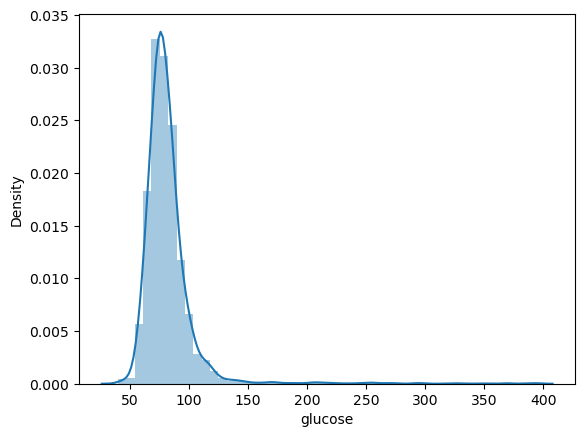

NormaltestResult(statistic=nan, pvalue=nan)


C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2587850877.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


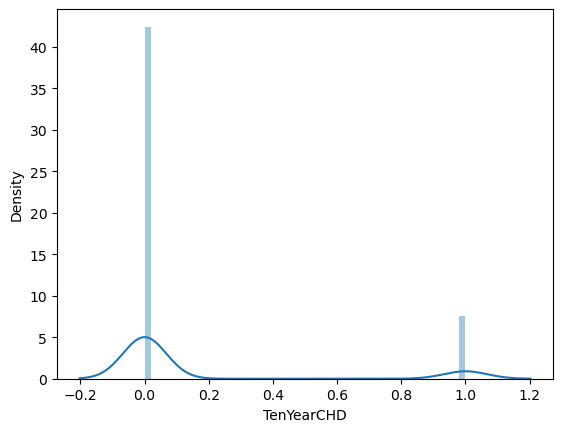

NormaltestResult(statistic=1385.7459536156703, pvalue=1.2276922448497556e-301)


In [331]:
for i in df_imputed.columns:
    sns.distplot(df[i])
    plt.show()
    print(normaltest(df[i]))


In [332]:
from scipy.stats import boxcox

In [333]:
df['BMI']=np.log(df['BMI'])

In [334]:
df['glucose']=np.log1p(df['glucose'])

In [335]:
df['sysBP']=np.log1p(df['sysBP'])

In [336]:
df['totChol']=np.log1p(df['totChol'])

C:\Users\alvin\AppData\Local\Temp\ipykernel_106112\2776147389.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['totChol'])


NormaltestResult(statistic=nan, pvalue=nan)

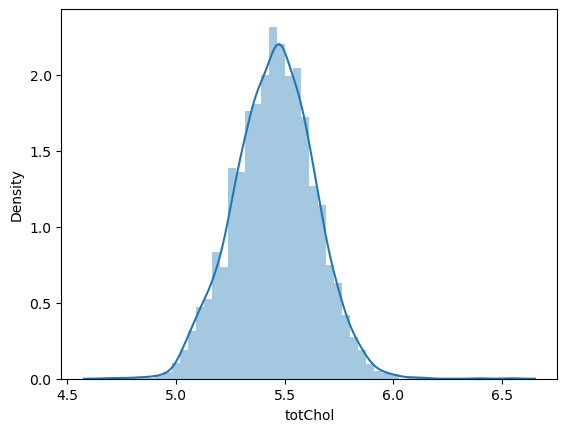

In [337]:
sns.distplot(df['totChol'])
normaltest(df['totChol'])

In [338]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

In [339]:
X=df_imputed.drop(["TenYearCHD",'education'],axis=1)
y=df_imputed["TenYearCHD"]

In [340]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

In [341]:
for train_idx,test_idx in sss.split(X,y):
    X_train,X_test=X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test=y.iloc[train_idx],y.iloc[test_idx]

In [342]:
from sklearn.preprocessing import StandardScaler

In [343]:
from sklearn.pipeline import Pipeline

In [344]:
estimator=Pipeline([("scaler",StandardScaler()),
                    ("lr",LogisticRegression(penalty='l2',max_iter=100000))])
params={'lr__C':np.geomspace(0.1,1,10)}

In [345]:
from sklearn.model_selection import GridSearchCV

In [346]:
grid=GridSearchCV(estimator,params,cv=4)

In [347]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [348]:
grid.fit(X_train,y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=100000))]),
             param_grid={'lr__C': array([0.1       , 0.12915497, 0.16681005, 0.21544347, 0.27825594,
       0.35938137, 0.46415888, 0.59948425, 0.77426368, 1.        ])})

In [349]:
pred=grid.predict(X_test)

In [350]:
grid.best_params_

{'lr__C': 0.46415888336127786}

In [351]:
from sklearn.metrics import confusion_matrix, classification_report


In [352]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77      1079
         1.0       0.25      0.60      0.35       193

    accuracy                           0.66      1272
   macro avg       0.58      0.64      0.56      1272
weighted avg       0.80      0.66      0.71      1272



In [353]:
confusion_matrix(y_test,pred)

array([[727, 352],
       [ 77, 116]], dtype=int64)

In [359]:

y_pred_proba = grid.predict_proba(X_test)
y_pred = (y_pred_proba[:, 1] >= 0.3).astype(int)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.38      0.54      1079
         1.0       0.20      0.87      0.33       193

    accuracy                           0.45      1272
   macro avg       0.57      0.62      0.43      1272
weighted avg       0.83      0.45      0.51      1272



In [360]:
confusion_matrix(y_test,y_pred)

array([[407, 672],
       [ 25, 168]], dtype=int64)